In this notebook, we simply reproduce the examples presented in the paper [_"Retrieval and analysis of Eurostat open data with the eurostat package"_](https://journal.r-project.org/archive/2017/RJ-2017-019/RJ-2017-019.pdf) by L. Lahti, P. Biecek, M. Kainu and J. Huovari (_R Journal_ 9(1):385-392, 2017). See also this online [tutorial](https://rdrr.io/cran/eurostat/f/inst/doc/eurostat_tutorial.pdf) on `eurostat` package. 

In [1]:
library("eurostat")
library("ggrepel")

Loading required package: ggplot2


### Finding data

In [2]:
toc <-get_eurostat_toc()
head(toc)

title,code,type,last update of data,last table structure change,data start,data end,values
Database by themes,data,folder,NA,NA,NA,NA,NA
General and regional statistics,general,folder,NA,NA,NA,NA,NA
European and national indicators for short-term analysis,euroind,folder,NA,NA,NA,NA,NA
Business and consumer surveys (source: DG ECFIN),ei_bcs,folder,NA,NA,NA,NA,NA
Consumer surveys (source: DG ECFIN),ei_bcs_cs,folder,NA,NA,NA,NA,NA
Consumers - monthly data,ei_bsco_m,dataset,30.08.2018,30.08.2018,1980M01,2018M08,NA


In [3]:
head(search_eurostat("passenger transport"))

title,code,type,last update of data,last table structure change,data start,data end,values
Volume of passenger transport relative to GDP,tran_hv_pstra,dataset,30.07.2018,30.07.2018,2000,2016,NA
Modal split of passenger transport,tran_hv_psmod,dataset,27.08.2018,27.08.2018,1990,2016,NA
"Railway transport - total annual passenger transport (1 000 pass., million pkm)",rail_pa_total,dataset,07.08.2018,24.07.2018,2004,2016,NA
Railway transport - passenger transport by type of transport (detailed reporting only) (1 000 pass.),rail_pa_typepas,dataset,17.07.2018,31.08.2017,2004,2016,NA
Railway transport - passenger transport by type of transport (detailed reporting only) (million pkm),rail_pa_typepkm,dataset,17.07.2018,31.08.2017,2004,2016,NA
International railway passenger transport from the reporting country to the country of disembarkation (1 000 passengers),rail_pa_intgong,dataset,16.08.2018,17.07.2018,2004,2017,NA


### Downloading data

In [4]:
id <-search_eurostat("Modal split of passenger transport", type ="table")$code[1]
print(id)

[1] "t2020_rk310"


In [5]:
dat <-get_eurostat(id, time_format = "num")
str(dat)
head(dat)

Table t2020_rk310 cached at /tmp/Rtmp6wpxSl/eurostat/t2020_rk310_num_code_TF.rds


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2536 obs. of  5 variables:
 $ unit   : Factor w/ 1 level "PC": 1 1 1 1 1 1 1 1 1 1 ...
 $ vehicle: Factor w/ 3 levels "BUS_TOT","CAR",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ geo    : Factor w/ 35 levels "AT","BE","CH",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ time   : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ values : num  11 10.6 3.7 9.1 11.3 32.4 14.9 13.5 6 24.8 ...


unit,vehicle,geo,time,values
PC,BUS_TOT,AT,1990,11.0
PC,BUS_TOT,BE,1990,10.6
PC,BUS_TOT,CH,1990,3.7
PC,BUS_TOT,DE,1990,9.1
PC,BUS_TOT,DK,1990,11.3
PC,BUS_TOT,EL,1990,32.4


In [6]:
dat2 <- get_eurostat(id, filters = list(geo = c("EU28", "FI"), lastTimePeriod=1), time_format = "num")
head(dat2)

unit,vehicle,geo,time,values
PC,BUS_TOT,EU28,2016,9.4
PC,BUS_TOT,FI,2016,11.9
PC,CAR,EU28,2016,82.9
PC,CAR,FI,2016,82.5
PC,TRN,EU28,2016,7.7
PC,TRN,FI,2016,5.6


**Replacing codes with labels**

In [7]:
datl2 <- get_eurostat(id, filters = list(geo = c("EU28", "FI"),lastTimePeriod = 1), type = "label", time_format = "num")
head(datl2)

unit,vehicle,geo,time,values
Percentage,"Motor coaches, buses and trolley buses",European Union (current composition),2016,9.4
Percentage,"Motor coaches, buses and trolley buses",Finland,2016,11.9
Percentage,Passenger cars,European Union (current composition),2016,82.9
Percentage,Passenger cars,Finland,2016,82.5
Percentage,Trains,European Union (current composition),2016,7.7
Percentage,Trains,Finland,2016,5.6


In [8]:
datl <- label_eurostat(dat)
head(datl)

unit,vehicle,geo,time,values
Percentage,"Motor coaches, buses and trolley buses",Austria,1990,11.0
Percentage,"Motor coaches, buses and trolley buses",Belgium,1990,10.6
Percentage,"Motor coaches, buses and trolley buses",Switzerland,1990,3.7
Percentage,"Motor coaches, buses and trolley buses",Germany (until 1990 former territory of the FRG),1990,9.1
Percentage,"Motor coaches, buses and trolley buses",Denmark,1990,11.3
Percentage,"Motor coaches, buses and trolley buses",Greece,1990,32.4


In [9]:
label_eurostat_vars(names(datl))
levels(datl$vehicle)

[1] "Unit of measure"                                                                     
[2] "Vehicles"                                                                            
[3] "Geopolitical entity (reporting)"                                                     
[4] "Period of time (a=annual, q=quarterly, m=monthly, d=daily, c=cumulated from January)"

[1] "Motor coaches, buses and trolley buses"
[2] "Passenger cars"                        
[3] "Trains"

### Selecting and modifying data

**EFTA, Eurozone, EU and EU candidate countries**

In [10]:
data(efta_countries)
efta_countries

code,name
IS,Iceland
LI,Liechtenstein
NO,Norway
CH,Switzerland


**EU data from 2012 in all vehicles**

In [11]:
dat_eu12 <-subset(datl, geo=="European Union (current composition)" & time==2012)
dat_eu12

unit,vehicle,geo,time,values
Percentage,"Motor coaches, buses and trolley buses",European Union (current composition),2012,9.5
Percentage,Passenger cars,European Union (current composition),2012,82.9
Percentage,Trains,European Union (current composition),2012,7.7


**EU data from 2000 - 2012 with vehicle types as variables**

In [12]:
library("tidyr")
dat_eu_0012 <- subset(dat, geo == "EU28" & time %in% 2000:2012)
dat_eu_0012_wide <- spread(dat_eu_0012, vehicle, values)
subset(dat_eu_0012_wide, select = -geo)

unit,time,BUS_TOT,CAR,TRN
PC,2000,10.4,82.4,7.2
PC,2001,10.2,82.7,7.1
PC,2002,9.9,83.3,6.8
PC,2003,9.9,83.5,6.7
PC,2004,9.8,83.4,6.8
PC,2005,9.8,83.3,6.9
PC,2006,9.7,83.2,7.1
PC,2007,9.8,83.1,7.1
PC,2008,9.9,82.8,7.4
PC,2009,9.3,83.6,7.1


**Train passengers for selected EU countries in 2000 - 2012**

In [13]:
dat_trains <- subset(datl, geo %in% c("Austria", "Belgium", "Finland", "Sweden") & time %in% 2000:2012 & vehicle == "Trains")
dat_trains_wide <- spread(dat_trains, geo, values)
subset (dat_trains_wide, select = - vehicle)

unit,time,Austria,Belgium,Finland,Sweden
Percentage,2000,9.7,6.3,5.1,6.8
Percentage,2001,9.7,6.4,4.8,7.1
Percentage,2002,9.7,6.5,4.8,7.1
Percentage,2003,9.5,6.5,4.7,7.0
Percentage,2004,9.4,7.1,4.7,6.8
Percentage,2005,9.8,6.6,4.8,7.1
Percentage,2006,10.0,6.9,4.8,7.6
Percentage,2007,10.0,7.1,5.0,7.9
Percentage,2008,11.1,7.5,5.4,8.6
Percentage,2009,11.1,7.5,5.1,8.7


### Visualization

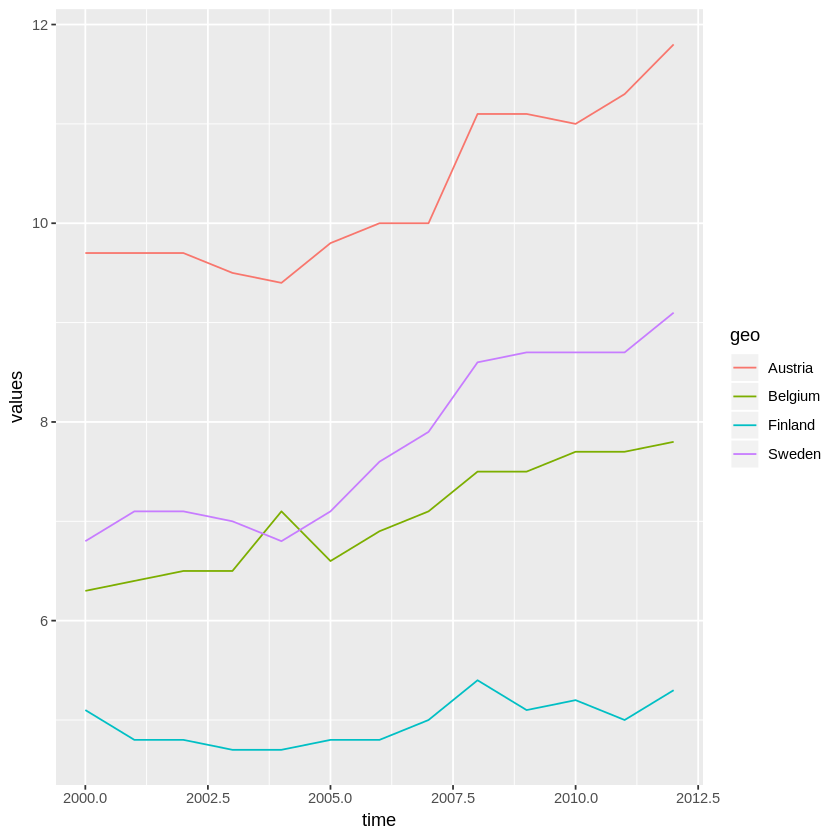

In [14]:
library(ggplot2)
p <- ggplot (dat_trains, aes( x = time, y = values, colour = geo))
p <- p + geom_line()
print(p)

Triangle plot


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Table ten00081 cached at /tmp/Rtmp6wpxSl/eurostat/ten00081_date_code_TF.rds


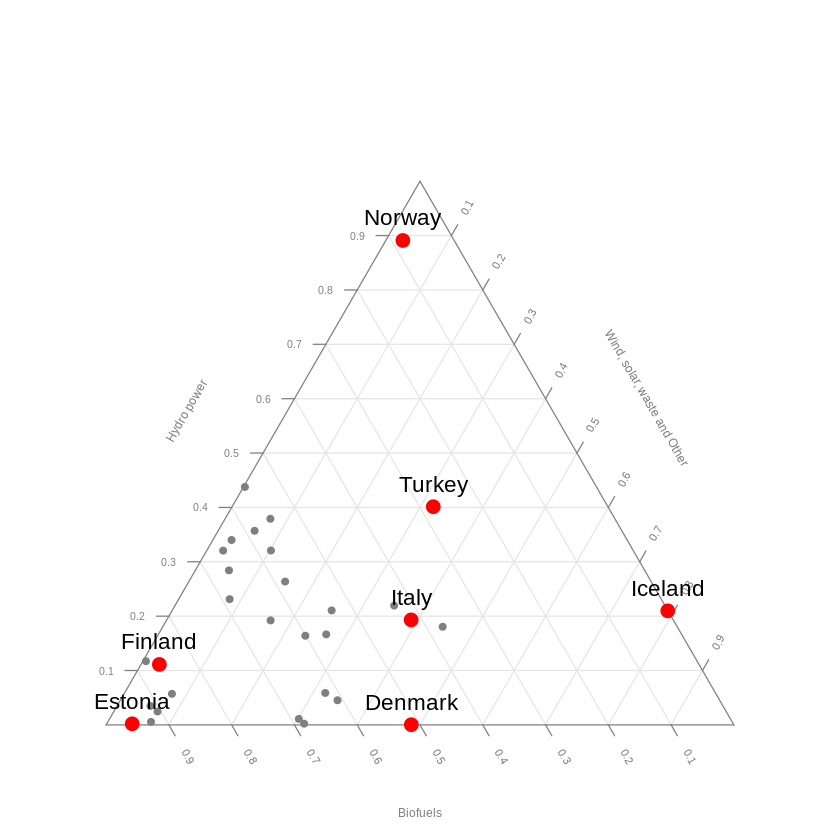

In [15]:
library(tidyr)
library(plotrix)
library(eurostat)
library(dplyr)

# All sources of renewable energy are to be grouped into three sets
 dict <- c("Solid biofuels (excluding charcoal)" = "Biofuels",
 "Biogasoline" = "Biofuels",
 "Other liquid biofuels" = "Biofuels",
 "Biodiesels" = "Biofuels",
 "Biogas" = "Biofuels",
 "Hydro power" = "Hydro power",
 "Tide, Wave and Ocean" = "Hydro power",
 "Solar thermal" = "Wind, solar, waste and Other",
 "Geothermal Energy" = "Wind, solar, waste and Other",
 "Solar photovoltaic" = "Wind, solar, waste and Other",
 "Municipal waste (renewable)" = "Wind, solar, waste and Other",
 "Wind power" = "Wind, solar, waste and Other",
 "Bio jet kerosene" = "Wind, solar, waste and Other")
# Some cleaning of the data is required
 energy3 <- get_eurostat("ten00081") %>%
 label_eurostat(dat) %>%
 filter(time == "2013-01-01",
 product != "Renewable energies") %>%
 mutate(nproduct = dict[as.character(product)], # just three categories
 geo = gsub(geo, pattern=" \\(.*", replacement="")) %>%
 select(nproduct, geo, values) %>%
 group_by(nproduct, geo) %>%
 summarise(svalue = sum(values)) %>%
 group_by(geo) %>%
 mutate(tvalue = sum(svalue),
 svalue = svalue/sum(svalue)) %>%
 filter(tvalue > 1000) %>% # only large countries
 spread(nproduct, svalue)
 
# Triangle plot
 par(cex=0.75, mar=c(0,0,0,0))
 positions <- plotrix::triax.plot(as.matrix(energy3[, c(3,5,4)]),
                     show.grid = TRUE,
                     label.points= FALSE, point.labels = energy3$geo,
                     col.axis="gray50", col.grid="gray90",
                     pch = 19, cex.axis=0.8, cex.ticks=0.7, col="grey50")

 # Larger labels
 ind <- which(energy3$geo %in%  c("Norway", "Iceland","Denmark","Estonia", "Turkey", "Italy", "Finland"))
 df <- data.frame(positions$xypos, geo = energy3$geo)
 points(df$x[ind], df$y[ind], cex=2, col="red", pch=19)
 text(df$x[ind], df$y[ind], df$geo[ind], adj = c(0.5,-1), cex=1.5)

**Maps**

Disposable income of private households by NUTS 2 regions at 1:60mln resolution using tmap

Linking to GEOS 3.6.2, GDAL 2.2.3, proj.4 4.9.3
Table tgs00026 cached at /tmp/Rtmp6wpxSl/eurostat/tgs00026_raw_code_FF.rds

COPYRIGHT NOTICE

When data downloaded from this page 
<http://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units>
is used in any printed or electronic publication, 
in addition to any other provisions 
applicable to the whole Eurostat website, 
data source will have to be acknowledged 
in the legend of the map and 
in the introductory page of the publication 
with the following copyright notice:

- EN: (C) EuroGeographics for the administrative boundaries
- FR: (C) EuroGeographics pour les limites administratives
- DE: (C) EuroGeographics bezuglich der Verwaltungsgrenzen

For publications in languages other than 
English, French or German, 
the translation of the copyright notice 
in the language of the publication shall be used.

If you intend to use the data commercially, 
please contact EuroGeographics for 
informatio

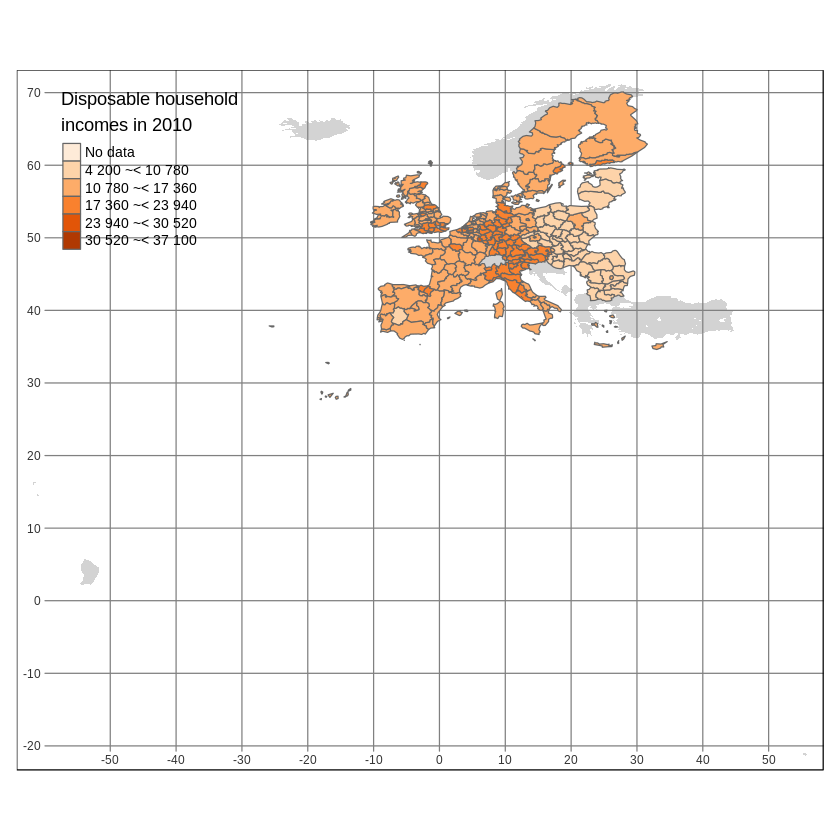

In [16]:
library(dplyr)
library(eurostat)
library(sf)
library(tmap)

# Download attribute data from Eurostat
sp_data <- eurostat::get_eurostat("tgs00026", time_format = "raw", stringsAsFactors = FALSE) %>% 
  # subset to have only a single row per geo
  dplyr::filter(time == 2010, nchar(geo) == 4) %>% 
  # categorise
  dplyr::mutate(income = cut_to_classes(values, n = 5))

# Download geospatial data from GISCO
geodata <- get_eurostat_geospatial(output_class = "sf", resolution = "60", nuts_level = 2, year = 2010)

# merge with attribute data with geodata
map_data <- inner_join(geodata, sp_data)

# Construct the map
map1 <- tmap::tm_shape(geodata) +
  tmap::tm_fill("lightgrey") +
  tmap::tm_shape(map_data) +
  tmap::tm_grid() +
  tmap::tm_polygons("income", title = "Disposable household\nincomes in 2010",  
                    palette = "Oranges")
tmap_mode("plot")
print(map1)  


Disposable income of private households by NUTS 2 regions in Poland with labels at 1:1mln resolution using tmap

[1] "Let us focus on year 2014 and NUTS-3 level"
[1] "Download geospatial data from GISCO"



COPYRIGHT NOTICE

When data downloaded from this page 
<http://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units>
is used in any printed or electronic publication, 
in addition to any other provisions 
applicable to the whole Eurostat website, 
data source will have to be acknowledged 
in the legend of the map and 
in the introductory page of the publication 
with the following copyright notice:

- EN: (C) EuroGeographics for the administrative boundaries
- FR: (C) EuroGeographics pour les limites administratives
- DE: (C) EuroGeographics bezuglich der Verwaltungsgrenzen

For publications in languages other than 
English, French or German, 
the translation of the copyright notice 
in the language of the publication shall be used.

If you intend to use the data commercially, 
please contact EuroGeographics for 
information regarding their licence agreements.
          
sf at resolution 1:60 read from local file

# --------------------------
H

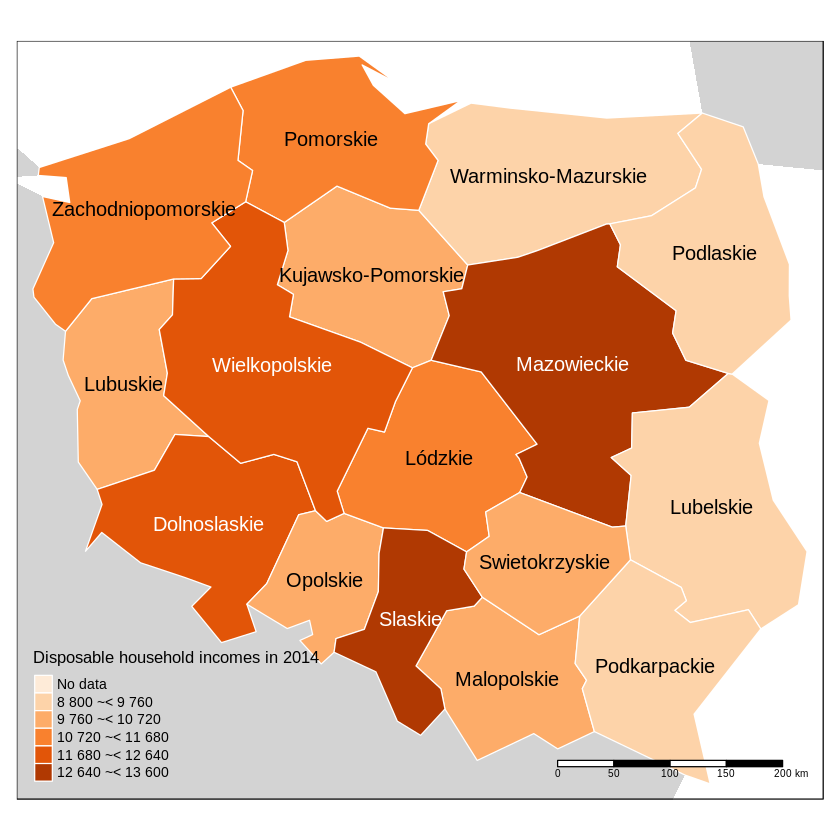

In [17]:
library(eurostat)
library(dplyr)
library(sf)
library(RColorBrewer)

# Downloading and manipulating the tabular data
print("Let us focus on year 2014 and NUTS-3 level")
euro_sf2 <- get_eurostat("tgs00026", time_format = "raw",
                         stringsAsFactors = FALSE,
			 filter = list(time = "2014")) %>% 
 
  # Subset to NUTS-3 level
  dplyr::filter(grepl("PL",geo)) %>% 
  # label the single geo column
  mutate(label = paste0(label_eurostat(.)[["geo"]], "\n", values, "€"),
         income = cut_to_classes(values))

print("Download geospatial data from GISCO")
geodata <- get_eurostat_geospatial(output_class = "sf", resolution = "60", nuts_level = 2, year = 2013)

# Merge with attribute data with geodata
map_data <- inner_join(geodata, euro_sf2)

# plot map
map2 <- tm_shape(geodata) +
  tm_fill("lightgrey") +
  tm_shape(map_data, is.master = TRUE) +
  tm_polygons("income", title = "Disposable household incomes in 2014",
              palette = "Oranges", border.col = "white") + 
  tm_text("NUTS_NAME", just = "center") + 
  tm_scale_bar()
map2

Disposable income of private households by NUTS 2 regions at 1:10mln resolution using spplot

Reading cache file /tmp/Rtmp6wpxSl/eurostat/tgs00026_raw_code_FF.rds
Table  tgs00026  read from cache file:  /tmp/Rtmp6wpxSl/eurostat/tgs00026_raw_code_FF.rds

COPYRIGHT NOTICE

When data downloaded from this page 
<http://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units>
is used in any printed or electronic publication, 
in addition to any other provisions 
applicable to the whole Eurostat website, 
data source will have to be acknowledged 
in the legend of the map and 
in the introductory page of the publication 
with the following copyright notice:

- EN: (C) EuroGeographics for the administrative boundaries
- FR: (C) EuroGeographics pour les limites administratives
- DE: (C) EuroGeographics bezuglich der Verwaltungsgrenzen

For publications in languages other than 
English, French or German, 
the translation of the copyright notice 
in the language of the publication shall be used.

If you intend to use the data commercially, 
please con

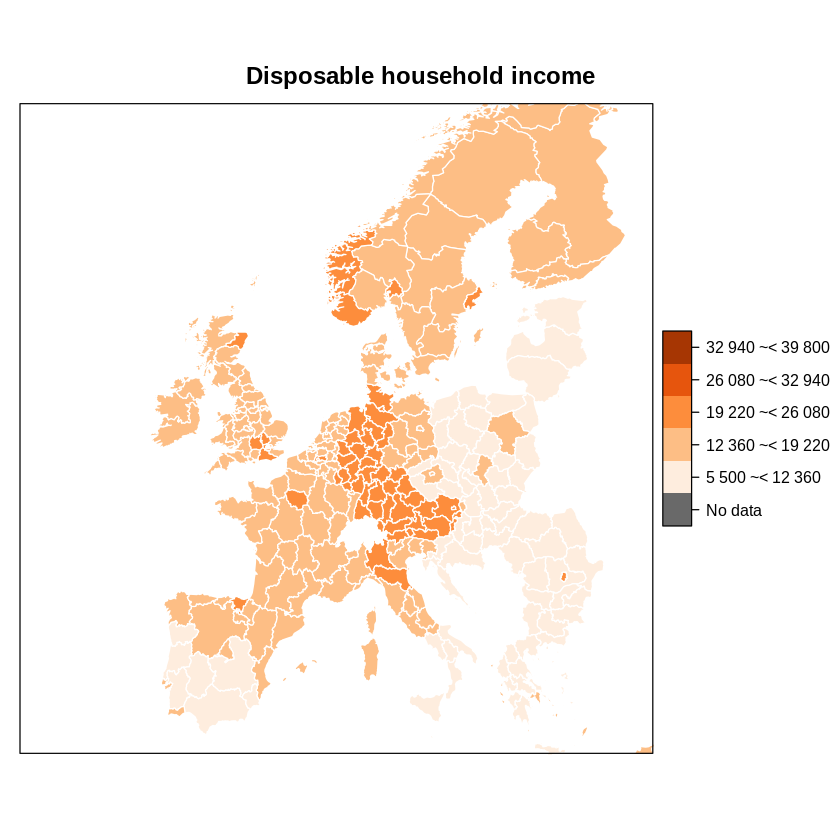

In [18]:
library(sp)
library(eurostat)
library(dplyr)
library(RColorBrewer)
dat <- get_eurostat("tgs00026", time_format = "raw", stringsAsFactors = FALSE) %>% 
  # subsetting to year 2014 and NUTS-2 level
  dplyr::filter(time == 2014, nchar(geo) == 4) %>% 
  # classifying the values the variable
  dplyr::mutate(cat = cut_to_classes(values))

# Download geospatial data from GISCO
geodata <- get_eurostat_geospatial(output_class = "spdf", resolution = "10", nuts_level = 2, year = 2013)

# merge with attribute data with geodata
geodata@data <- left_join(geodata@data, dat)

# plot map
sp::spplot(obj = geodata, "cat", main = "Disposable household income",
	   xlim = c(-22,34), ylim = c(35,70), 
           col.regions = c("dim grey", brewer.pal(n = 5, name = "Oranges")),
	   col = "white", usePolypath = FALSE)

Disposable income of private households by NUTS 2 regions at 1:60mln resolution using ggplot2

Reading cache file /tmp/Rtmp6wpxSl/eurostat/tgs00026_raw_code_FF.rds
Table  tgs00026  read from cache file:  /tmp/Rtmp6wpxSl/eurostat/tgs00026_raw_code_FF.rds

COPYRIGHT NOTICE

When data downloaded from this page 
<http://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units>
is used in any printed or electronic publication, 
in addition to any other provisions 
applicable to the whole Eurostat website, 
data source will have to be acknowledged 
in the legend of the map and 
in the introductory page of the publication 
with the following copyright notice:

- EN: (C) EuroGeographics for the administrative boundaries
- FR: (C) EuroGeographics pour les limites administratives
- DE: (C) EuroGeographics bezuglich der Verwaltungsgrenzen

For publications in languages other than 
English, French or German, 
the translation of the copyright notice 
in the language of the publication shall be used.

If you intend to use the data commercially, 
please con

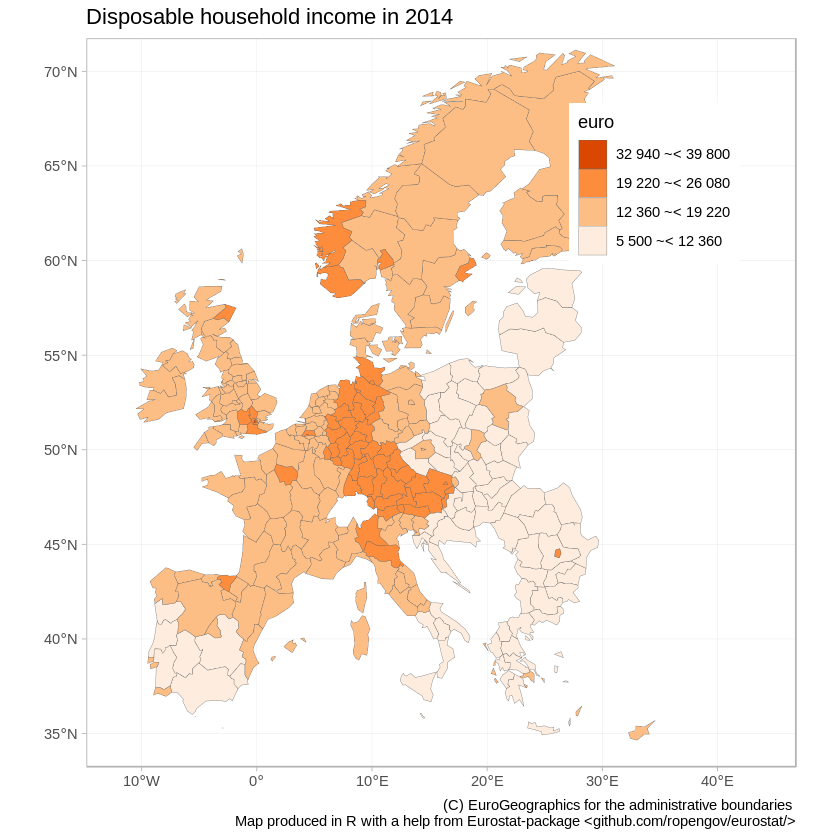

In [19]:
library(eurostat)
library(dplyr)
library(ggplot2)
dat <- get_eurostat("tgs00026", time_format = "raw", stringsAsFactors = FALSE) %>% 
  # subsetting to year 2014 and NUTS-2 level
  dplyr::filter(time == 2014, nchar(geo) == 4) %>% 
  # classifying the values the variable
  dplyr::mutate(cat = cut_to_classes(values))

# Download geospatial data from GISCO
geodata <- get_eurostat_geospatial(resolution = "60", nuts_level = "2", year = 2013)

# merge with attribute data with geodata
map_data <- inner_join(geodata, dat)

ggplot(data=map_data) + geom_sf(aes(fill=cat),color="dim grey", size=.1) + 
    scale_fill_brewer(palette = "Oranges") +
  guides(fill = guide_legend(reverse=T, title = "euro")) +
  labs(title="Disposable household income in 2014",
       caption="(C) EuroGeographics for the administrative boundaries 
                Map produced in R with a help from Eurostat-package <github.com/ropengov/eurostat/>") +
  theme_light() + theme(legend.position=c(.8,.8)) +
  coord_sf(xlim=c(-12,44), ylim=c(35,70))

### SDMX

In [20]:
library(rsdmx)

# Data set URL
url <- "http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/cdh_e_fos/..PC.FOS1.BE/?startperiod=2005&endPeriod=2011"

# Read the data from eurostat
d <- readSDMX(url)

# Convert to data frame and show the first entries
df <- as.data.frame(d)

head(df)

UNIT,Y_GRAD,FOS07,GEO,FREQ,obsTime,obsValue,OBS_STATUS
PC,TOTAL,FOS1,BE,A,2009,NA,na
PC,TOTAL,FOS1,BE,A,2006,NA,na
PC,Y_GE1990,FOS1,BE,A,2009,43.75,NA
PC,Y_GE1990,FOS1,BE,A,2006,NA,na


### Further examples

In [21]:
query <- search_eurostat("road accidents", type = "table")

In [22]:
query$code[[1]]
query$title[[1]]

[1] "sdg_11_40"

[1] "People killed in road accidents (source: DG MOVE)"

Note that the table `tsdtr420` mentioned in the original paper has been discontinued (see for instance this [archive](https://ec.europa.eu/eurostat/statistics-explained/index.php?oldid=54178)), it has been replaced with a dedicated [EU SDG](https://ec.europa.eu/eurostat/statistics-explained/index.php/SDG_11_-_Sustainable_cities_and_communities_(statistical_annex)) indicator, namely `sdg_11_40` ([this table](https://ec.europa.eu/eurostat/web/products-datasets/-/sdg_11_40)).

In [23]:
dat <- get_eurostat(id = "sdg_11_40", time_format = "num")
head(dat)

Table sdg_11_40 cached at /tmp/Rtmp6wpxSl/eurostat/sdg_11_40_num_code_TF.rds


unit,geo,time,values
NR,AT,2001,958
NR,BE,2001,1486
NR,BG,2001,1011
NR,CY,2001,98
NR,CZ,2001,1333
NR,DE,2001,6977


We can still run similar operations:

In [24]:
countries <- c("UK", "SK", "FR", "PL", "ES", "PT")
t1 <- get_eurostat("sdg_11_40", filters = list(geo = countries))

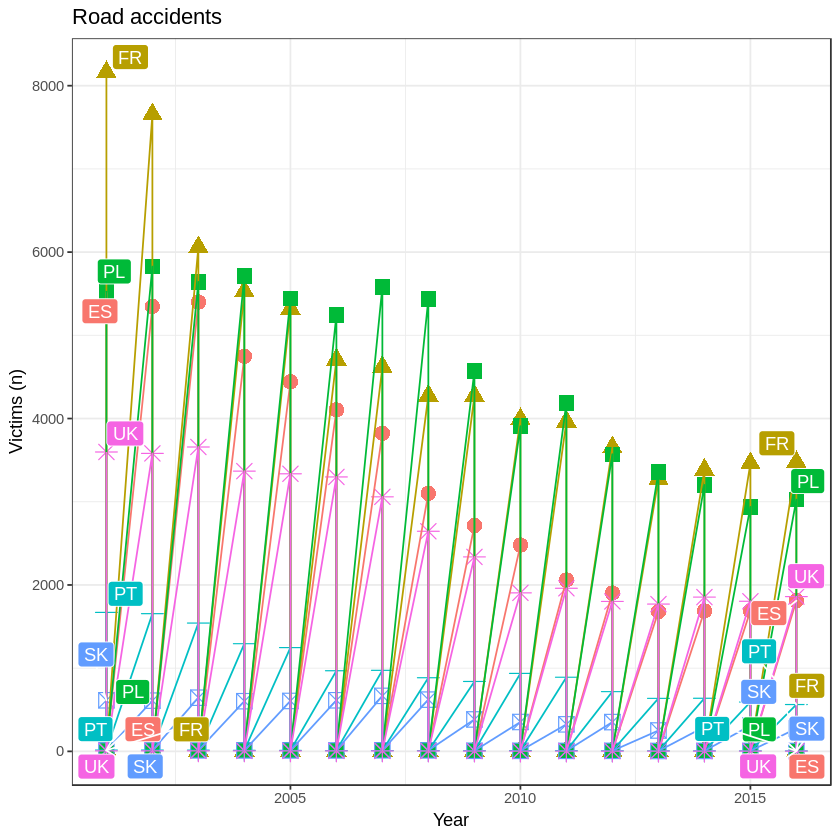

In [25]:
library("ggplot2")
library("ggrepel")
ggplot(t1, aes(x = time, y = values, color = geo, group = geo, shape = geo)) +
    geom_point(size = 4) + geom_line() + theme_bw() +
    ggtitle("Road accidents") + xlab("Year") + ylab("Victims (n)") +
    theme(legend.position = "none") +
    ggrepel::geom_label_repel(data = t1 %>% group_by(geo) %>% na.omit() %>%
    filter(time %in% c(min(time), max(time))), aes(fill = geo, label = geo), color = "white")